### File: performance_analysis_full_updated.ipynb
#### Created with assistance of ChatGPT (OpenAI) – reviewed on 2025-05-11
#### Author: Maria Heinrich

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

# Load your execution times CSV
df = pd.read_csv("Execution_Times.csv")  # Adjust the path as needed

# Parse Environment and Date from Filename
def parse_metadata(filename):
    if "Notebook" in filename:
        environment = "Fabric"
    else:
        environment = "Databricks"

    if "_0505" in filename or "_21_" in filename:
        date = "May 5"
    elif "_0506" in filename or "_22_" in filename:
        date = "May 6"
    elif "_250511_" in filename or "_18_" in filename:
        date = "May 11"
    else:
        date = "Unknown"

    return pd.Series([environment, date])

# Apply classification
df[['Environment', 'Date']] = df['Filename'].apply(parse_metadata)
df = df.rename(columns={"Execution time in seconds": "Execution Time (s)"})
df = df[['Environment', 'Date', 'Execution Time (s)']]
df.head()

,Environment,Date,Execution Time (s)
0,Databricks,May 5,51.66
1,Databricks,May 5,44.15
2,Databricks,May 5,45.22
3,Databricks,May 5,44.93
4,Databricks,May 5,45.27


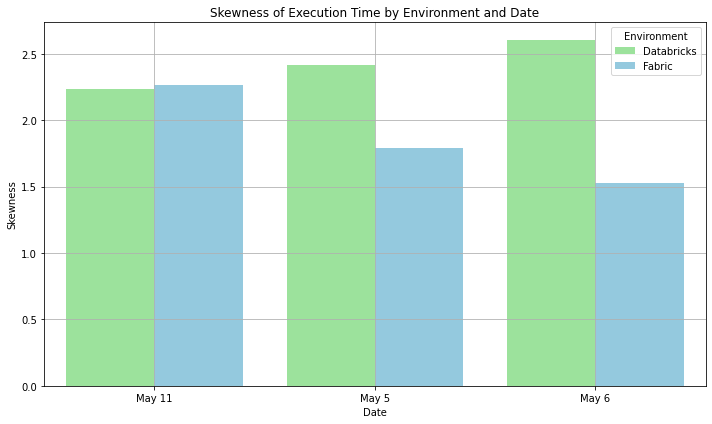

In [48]:
# Load your execution times CSV
df = pd.read_csv("Execution_Times.csv")  # Adjust the path as needed

# Apply classification
df[['Environment', 'Date']] = df['Filename'].apply(parse_metadata)
df = df.rename(columns={"Execution time in seconds": "Execution Time (s)"})
df = df[['Environment', 'Date', 'Execution Time (s)']]

test_day_results = df.groupby(["Environment", "Date"])["Execution Time (s)"].apply(skew).reset_index(name="Skewness")
test_day_results = test_day_results.rename(columns={"Execution Time (s)": "Skewness"})
test_day_results = test_day_results.sort_values(by=["Environment", "Date"])



# Group by Environment and Date to calculate skewness
test_day_results = df.groupby(["Environment", "Date"])["Execution Time (s)"].apply(skew).reset_index(name="Skewness")

# Define custom colors
custom_palette = {
    "Databricks": "lightgreen",  # match distribution plot for Databricks
    "Fabric": "skyblue"          # match distribution plot for Fabric
}

# Create the skewness barplot with the specified color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=test_day_results, x="Date", y="Skewness", hue="Environment", palette=custom_palette)
plt.title("Skewness of Execution Time by Environment and Date")
plt.xlabel("Date")
plt.ylabel("Skewness")
plt.grid(True)
plt.tight_layout()
plt.show()



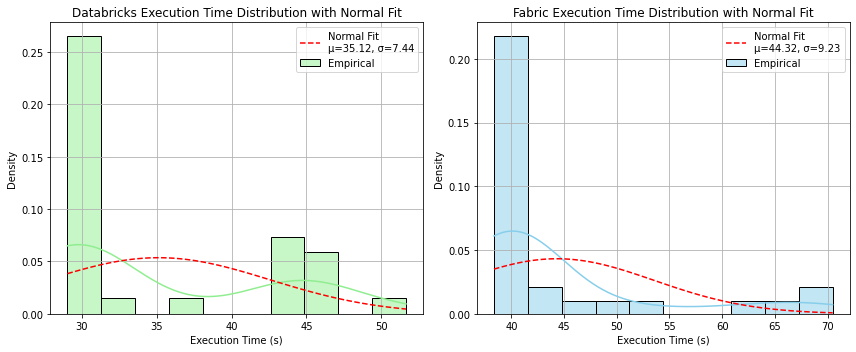

In [49]:
# Extract execution times for Fabric and Databricks
fabric_times = df[df["Environment"] == "Fabric"]["Execution Time (s)"]
databricks_times = df[df["Environment"] == "Databricks"]["Execution Time (s)"]


# Plot distribution with fitted normal for Databricks
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(databricks_times, bins=10, kde=True, stat="density", color="lightgreen", label="Empirical")
mu_db, std_db = norm.fit(databricks_times)
x_db = np.linspace(databricks_times.min(), databricks_times.max(), 100)
p_db = norm.pdf(x_db, mu_db, std_db)
plt.plot(x_db, p_db, 'r--', label=f'Normal Fit\nμ={mu_db:.2f}, σ={std_db:.2f}')
plt.title("Databricks Execution Time Distribution with Normal Fit")
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Plot distribution with fitted normal for Fabric
plt.subplot(1, 2, 2)
sns.histplot(fabric_times, bins=10, kde=True, stat="density", color="skyblue", label="Empirical")
mu_fab, std_fab = norm.fit(fabric_times)
x_fab = np.linspace(fabric_times.min(), fabric_times.max(), 100)
p_fab = norm.pdf(x_fab, mu_fab, std_fab)
plt.plot(x_fab, p_fab, 'r--', label=f'Normal Fit\nμ={mu_fab:.2f}, σ={std_fab:.2f}')
plt.title("Fabric Execution Time Distribution with Normal Fit")
plt.xlabel("Execution Time (s)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


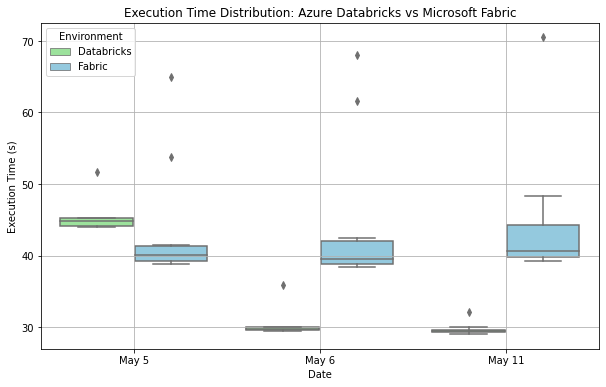

In [50]:

# Define custom colors
custom_palette = {
    "Databricks": "lightgreen",  # match distribution plot for Databricks
    "Fabric": "skyblue"          # match distribution plot for Fabric
}

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Date", y="Execution Time (s)", hue="Environment", palette=custom_palette)
plt.title("Execution Time Distribution: Azure Databricks vs Microsoft Fabric")
plt.grid(True)
plt.show()


In [51]:


summary = df.groupby(["Environment", "Date"])["Execution Time (s)"].agg(["mean", "min", "max", "std"]).reset_index()
summary



,Environment,Date,mean,min,max,std
0,Databricks,May 11,29.661,29.03,32.05,0.881860
1,Databricks,May 5,45.361,44.02,51.66,2.270861
2,Databricks,May 6,30.345,29.40,35.87,1.953119
3,Fabric,May 11,44.528,39.26,70.49,9.568024
4,Fabric,May 5,43.771,38.85,64.98,8.673421
5,Fabric,May 6,44.661,38.35,68.08,10.813046


In [52]:
# Perform T-Test across all days combined between Databricks and Fabric
db_all = df[df["Environment"] == "Databricks"]["Execution Time (s)"]
fab_all = df[df["Environment"] == "Fabric"]["Execution Time (s)"]

# T-test
t_all, p_all = stats.ttest_ind(db_all, fab_all, equal_var=False)

# Means
db_mean = db_all.mean()
fab_mean = fab_all.mean()

# Generate interpretation
overall_interpretation = f"""
### T-Test: Databricks vs Fabric (All Days Combined)

- t = {t_all:.2f}, p = {p_all:.4f}
- Mean Execution Time — Databricks: {db_mean:.2f}s, Fabric: {fab_mean:.2f}s
- Result: {'A statistically significant difference' if p_all < 0.05 else 'No statistically significant difference'} in execution time.
  On average, **{'Databricks' if db_mean < fab_mean else 'Fabric'}** was faster across all days.
"""

overall_interpretation.strip()

'### T-Test: Databricks vs Fabric (All Days Combined)\n\n- t = -4.18, p = 0.0001\n- Mean Execution Time — Databricks: 35.12s, Fabric: 44.32s\n- Result: A statistically significant difference in execution time.\n  On average, **Databricks** was faster across all days.'

### T-Test: Databricks vs Fabric (All Days Combined)

- **t** = -4.18, **p** = 0.0001  
- **Mean Execution Time** — Databricks: 35.12s, Fabric: 44.32s  
- **Result**: A statistically significant difference in execution time.  
  On average, **Databricks** was faster across all days.
